<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_02_linear-regression_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Regression

# Solución de un problema de Regresión en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar variables independientes(X) y dependiente(y)]
2.   Partir el dataset en train y test
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clasificación de la especie de flor IRIS

1. Análisis del problema


Se quiere determinar el salario utilizando la antiguedad. Se tiene un dataset con valores de salario y antiguedad.
Este es un problema de regresión y de aprendizaje supervisado, pues se tienen ejemplos.

Se puede utilizar un clasificador como LinearRegression. Se usará R2 para calificar el modelo.
El dataset esta en



```
# url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/a4327dbd4334c0150af732995a470a32fc9e05c6/Salary_Data.csv"

```



2. Extraccion del dataset. Limpieza

In [1]:
import pandas as pd
import numpy as np

print("Importando Dataset.")
url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/a4327dbd4334c0150af732995a470a32fc9e05c6/Salary_Data.csv"
df = pd.read_csv(url)

Importando Dataset.


3. EDA. Análisis del dataset

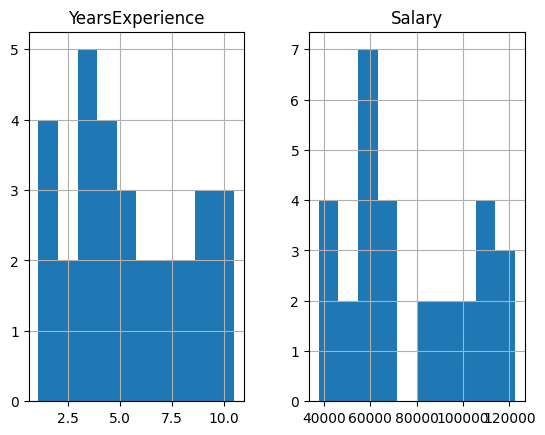

In [2]:
df.hist();

Grafica del dataset


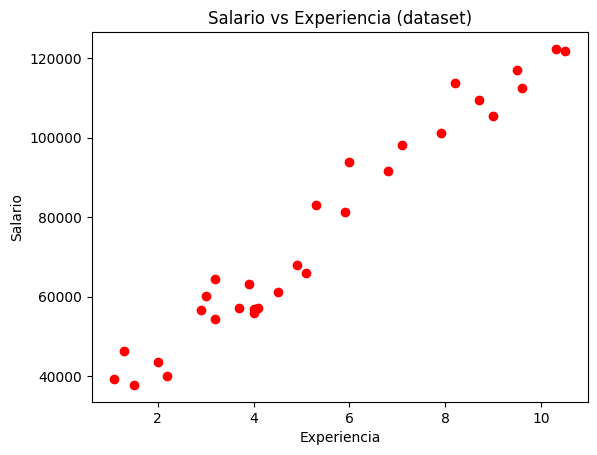

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

print("Grafica del dataset")
plt.scatter( df["YearsExperience"] , df["Salary"], color = 'red')
plt.title('Salario vs Experiencia (dataset)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [7]:
numeric_cols=["YearsExperience"]
target_col="Salary"

X = df[ numeric_cols ]
y = df[ target_col ]

5. Partir el dataset en train y test

In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Set de entrenamiento")
print(X_train.shape)
print("y entrenamiento")
print(y_train.shape)
print("Set de pruebas")
print(X_test.shape)
print("y pruebas")
print(y_test.shape)


Set de entrenamiento
(24, 1)
y entrenamiento
(24,)
Set de pruebas
(6, 1)
y pruebas
(6,)


6. Crear y Entrenar (Ajustar) el modelo.

In [9]:
print("Entrenando el modelo.")
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


Entrenando el modelo.


LinearRegression()

7. Hacer predicciones

In [13]:
y_pred = regressor.predict(X_test)
dataset = pd.DataFrame(data=X_test, columns=['YearsExperience'])
dataset["PREDICCION_Salary"]=list(y_pred)

8. Calificar el modelo

In [14]:
# Print out the statistics
from sklearn.metrics import r2_score
print("R2: ", r2_score(y_test, y_pred))
print("Coeficientes: \n", regressor.coef_)

R2:  0.988169515729126
Coeficientes: 
 [9312.57512673]


9. Visualizar el resultado

9. Visualizacion del resultado de la prueba


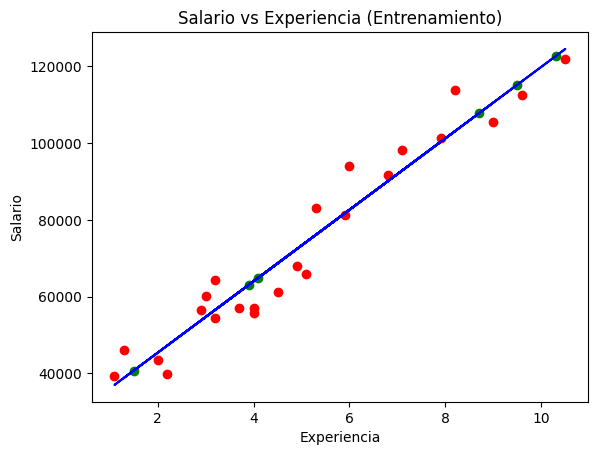

In [15]:
# 9. Visualizar el resultado de la prueba
print("9. Visualizacion del resultado de la prueba")
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Salario vs Experiencia (Entrenamiento)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

10. Elaborar conclusiones

El modelo tiene un alto R2, para realizar regresión sobre el dataset, por lo que es un modelo aceptable. Sin embargo se debe comprobar con un dataset con mayor numero de filas.

# EJERCICIO
Realice los mismos pasos para el siguiente problema: Usted ha sido seleccionado como ingeniero de Machine Learning para una EPS que busca determinar el indice de progreso de la diabetes en pacientes. Con el dataset dado, note que se tienen 10 atributos. La columna 11 es una medida cuantitativa del progreso de la enfermedad en un año despues de un baseline

Crear un modelo:
1. Tomando el bmi como variable independente, predecir el "progreso de la enfermedad"
2. Tomar todas las 10 caracteristicas y crear un modelo que pueda predecir la medida del "progreso de la enfermedad".

El dataset se encuentra en:

```
url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/main/diabetes.rwrite1.txt"
df = pd.read_csv(url, sep=" ")

```


1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

In [16]:
url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/main/diabetes.rwrite1.txt"
df = pd.read_csv(url, sep=" ")

3. EDA Análisis del dataset

In [18]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. partir el dataset en train y test

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Usted ha sido llamado de nuevo a trabajar sobre el problema de la diabetes. Ahora debe tomar todas las 10 caracteristicas y crear un modelo que pueda predecir la medida del "progreso de la enfermedad".


